In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Dataset/gapminder.csv')

In [3]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
y = df['life'].values
X = df['fertility'].values

In [5]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X_fertility = X.copy()

In [10]:
min(X_fertility)

1.28

In [11]:
max(X_fertility)

7.59

In [12]:
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

In [18]:
# Fit the model to the data
reg = LinearRegression()
reg.fit(X_fertility.reshape(-1,1),y)

LinearRegression()

In [20]:
y_pred = reg.predict(prediction_space)
y_pred

array([77.26904851, 76.69678573, 76.12452294, 75.55226016, 74.97999737,
       74.40773459, 73.83547181, 73.26320902, 72.69094624, 72.11868345,
       71.54642067, 70.97415788, 70.4018951 , 69.82963232, 69.25736953,
       68.68510675, 68.11284396, 67.54058118, 66.9683184 , 66.39605561,
       65.82379283, 65.25153004, 64.67926726, 64.10700447, 63.53474169,
       62.96247891, 62.39021612, 61.81795334, 61.24569055, 60.67342777,
       60.10116498, 59.5289022 , 58.95663942, 58.38437663, 57.81211385,
       57.23985106, 56.66758828, 56.0953255 , 55.52306271, 54.95079993,
       54.37853714, 53.80627436, 53.23401157, 52.66174879, 52.08948601,
       51.51722322, 50.94496044, 50.37269765, 49.80043487, 49.22817208])

In [23]:
print(reg.score(X_fertility.reshape(-1,1), y)*100)

61.92442167740035


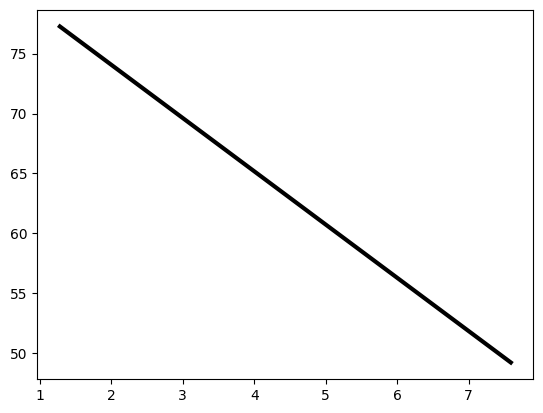

In [28]:
# Plot regression line
import matplotlib.pyplot as plt
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [31]:
reg_all = LinearRegression()

In [33]:
reg_all.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [34]:
y_pred = reg_all.predict(X_test.reshape(-1,1))

In [36]:
print("R^2: {}".format(reg_all.score(X_test.reshape(-1,1), y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X.reshape(-1,1),y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)*100))


[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 61.68819644425119


In [43]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X.reshape(-1,1),y,cv=3)
print(np.mean(cvscores_3)*100)

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X.reshape(-1,1),y,cv=10)
print(np.mean(cvscores_10)*100)


62.947157546535074
58.839377415711844


In [44]:
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso(alpha=0.4)

In [53]:
X_all_col = df[['population','HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality']]

In [58]:
lasso.fit(X_all_col,y)

Lasso(alpha=0.4)

In [61]:
df_columns = ['population', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality']
df_columns

['population',
 'HIV',
 'CO2',
 'BMI_male',
 'GDP',
 'BMI_female',
 'life',
 'child_mortality']

[ 2.05836256e-11 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.46492537e-06 -0.00000000e+00  9.79676650e-01 -2.78866632e-03]


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of labels (139).

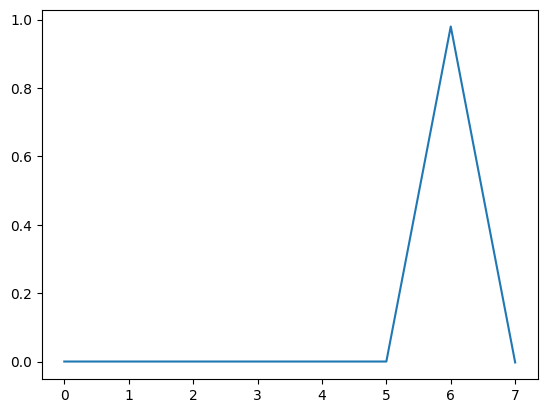

In [63]:
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), X_all_col.values, rotation=60)
plt.margins(0.02)
plt.show()

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge()

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X.reshape(-1,1),y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

In [67]:
ridge_scores

[0.5883937799012076,
 0.5883937810890251,
 0.5883937825224661,
 0.5883937842523205,
 0.5883937863398785,
 0.5883937888591029,
 0.5883937918992476,
 0.5883937955680182,
 0.5883937999953855,
 0.5883938053381861,
 0.5883938117856731,
 0.5883938195662116,
 0.588393828955357,
 0.5883938402855969,
 0.5883938539581026,
 0.5883938704568971,
 0.5883938903659409,
 0.5883939143897274,
 0.588393943378106,
 0.5883939783561882,
 0.588394020560374,
 0.5883940714817257,
 0.5883941329181661,
 0.5883942070372608,
 0.5883942964516736,
 0.588394404309778,
 0.5883945344043519,
 0.5883946913028015,
 0.5883948805029245,
 0.5883951086188735,
 0.5883953836026323,
 0.5883957150070234,
 0.5883961142968758,
 0.588396595215485,
 0.5883971742136649,
 0.5883978709483403,
 0.5883987088563167,
 0.5883997158060799,
 0.5884009248252862,
 0.5884023748927592,
 0.5884041117693265,
 0.5884061888189067,
 0.5884086677356407,
 0.5884116190384611,
 0.5884151221123312,
 0.5884192644524957,
 0.5884241395856918,
 0.588429842873430